In [141]:
from astropy.table import Table
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

In [5]:
d = Table.read("data.fits").to_pandas()

In [31]:
d.set_index(pd.MultiIndex.from_arrays([d.Metric, d.Filter]), inplace=True)

In [32]:
d

Metric Filter     Unit Operator  Design  Value_singleFrame  \
Metric Filter                                                              
AD1    HSC-G     AD1  HSC-G  marcsec       <=    20.0             14.500   
       HSC-I     AD1  HSC-I  marcsec       <=    20.0             17.300   
       HSC-R     AD1  HSC-R  marcsec       <=    20.0             13.200   
       HSC-Y     AD1  HSC-Y  marcsec       <=    20.0             13.300   
       HSC-Z     AD1  HSC-Z  marcsec       <=    20.0             12.000   
AD2    HSC-G     AD2  HSC-G  marcsec       <=    20.0             15.100   
       HSC-I     AD2  HSC-I  marcsec       <=    20.0             16.500   
       HSC-R     AD2  HSC-R  marcsec       <=    20.0             14.300   
       HSC-Y     AD2  HSC-Y  marcsec       <=    20.0             13.200   
       HSC-Z     AD2  HSC-Z  marcsec       <=    20.0             11.900   
AD3    HSC-G     AD3  HSC-G  marcsec       <=    30.0             14.400   
       HSC-I     AD3  HSC-I  marcsec       <=    30.0             16.300   
       HSC-R     AD3  HSC-R  marcsec       <=    30.0             13.200   
       HSC-Y     AD3  HSC-Y  marcsec       <=    30.0             13.000   
       HSC-Z     AD3  HSC-Z  marcsec       <=    30.0             12.100   
AF1    HSC-G     AF1  HSC-G                <=    10.0              4.590   
       HSC-I     AF1  HSC-I                <=    10.0              7.380   
       HSC-R     AF1  HSC-R                <=    10.0              3.500   
       HSC-Y     AF1  HSC-Y                <=    10.0              3.800   
       HSC-Z     AF1  HSC-Z                <=    10.0              2.670   
AF2    HSC-G     AF2  HSC-G                <=    10.0              5.060   
       HSC-I     AF2  HSC-I                <=    10.0              6.530   
       HSC-R     AF2  HSC-R                <=    10.0              4.330   
       HSC-Y     AF2  HSC-Y                <=    10.0              3.900   
       HSC-Z     AF2  HSC-Z                <=    10.0              2.720   
AF3    HSC-G     AF3  HSC-G                <=    10.0              1.330   
       HSC-I     AF3  HSC-I                <=    10.0              1.820   
       HSC-R     AF3  HSC-R                <=    10.0              0.789   
       HSC-Y     AF3  HSC-Y                <=    10.0              1.080   
       HSC-Z     AF3  HSC-Z                <=    10.0              0.642   
...              ...    ...      ...      ...     ...                ...   
AM1    HSC-G     AM1  HSC-G  marcsec       <=    10.0              2.610   
       HSC-I     AM1  HSC-I  marcsec       <=    10.0              5.510   
       HSC-R     AM1  HSC-R  marcsec       <=    10.0              3.100   
       HSC-Y     AM1  HSC-Y  marcsec       <=    10.0              3.360   
       HSC-Z     AM1  HSC-Z  marcsec       <=    10.0              4.510   
AM2    HSC-G     AM2  HSC-G  marcsec       <=    10.0              2.250   
       HSC-I     AM2  HSC-I  marcsec       <=    10.0              5.450   
       HSC-R     AM2  HSC-R  marcsec       <=    10.0              2.670   
       HSC-Y     AM2  HSC-Y  marcsec       <=    10.0              3.720   
       HSC-Z     AM2  HSC-Z  marcsec       <=    10.0              5.280   
AM3    HSC-G     AM3  HSC-G  marcsec       <=    15.0              1.170   
       HSC-I     AM3  HSC-I  marcsec       <=    15.0              2.480   
       HSC-R     AM3  HSC-R  marcsec       <=    15.0              1.240   
       HSC-Y     AM3  HSC-Y  marcsec       <=    15.0              1.510   
       HSC-Z     AM3  HSC-Z  marcsec       <=    15.0              2.520   
PA1    HSC-G     PA1  HSC-G     mmag       <=     5.0             17.800   
       HSC-I     PA1  HSC-I     mmag       <=     5.0             18.200   
       HSC-R     PA1  HSC-R     mmag       <=     5.0             17.600   
       HSC-Y     PA1  HSC-Y     mmag       <=     7.5             19.700   
       HSC-Z     PA1  HSC-Z     mmag       <=     7.5         

In [114]:
descriptions = {
    "AM1": "repeatability (marcsec) for pairs at 5 arcmin",
    "AM2": "repeatability (marcsec) for pairs at 20 arcmin",
    "AF1": "outlier fraction (%) for pairs at 5 min",
    "AF2": "outlier fraction (%) for pairs at 20 min",
}

In [115]:
def good(x, y=None):
    if y is None:
        y = x
    return x[np.isfinite(y)]

In [142]:
def metricHist(name, band):
    t = d.loc[name].loc[band]
    pyplot.figure(name)
    kwds = dict(range=(0, 15), bins=28, histtype='step', fill=True, alpha=0.5, linewidth=2)
    pyplot.hist(good(t.Value_jointcal), label="jointcal", hatch="\\", **kwds)
    pyplot.hist(good(t.Value_meas_mosaic), label="meas_mosaic", hatch="/", **kwds)
    pyplot.xlabel("%s: %s" % (name, descriptions[name]))
    pyplot.legend()

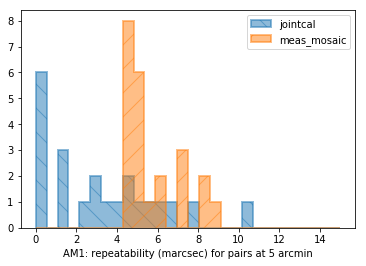

In [143]:
metricHist("AM1", "HSC-I")

In [152]:
def metricScatter(name1, name2, band):
    t1 = d.loc[name1].loc[band]
    t2 = d.loc[name2].loc[band]
    title = "%s vs. %s: %s" % (name1, name2, band)
    pyplot.figure(title, figsize=(8,6))
    assert np.all(t1.tract == t2.tract)
    pyplot.title(title)
    pyplot.scatter(t1.Value_jointcal, t2.Value_jointcal, label="jointcal")
    pyplot.scatter(t1.Value_meas_mosaic, t2.Value_meas_mosaic, label="meas_mosaic")
    pyplot.plot(np.concatenate([[j, m, None] for j, m in zip(t1.Value_jointcal, t1.Value_meas_mosaic)]),
                np.concatenate([[j, m, None] for j, m in zip(t2.Value_jointcal, t2.Value_meas_mosaic)]),
                'k', alpha=0.1, label="same tract")
    pyplot.xlabel("%s: %s" % (name1, descriptions[name1]))
    pyplot.ylabel("%s: %s" % (name2, descriptions[name2]))
    pyplot.legend()
    pyplot.savefig("%sv%s_%s.png" % (name1, name2, band))

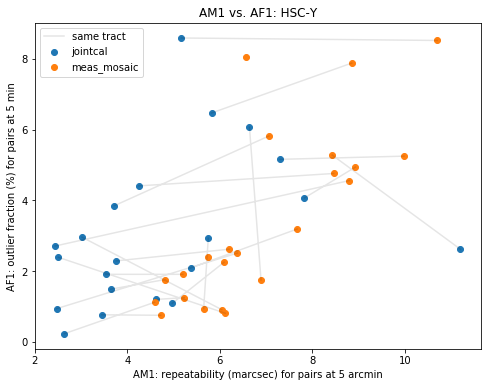

In [157]:
metricScatter("AM1", "AF1", "HSC-Y")